<a href="https://colab.research.google.com/github/Ayncode/Mental-Health-Project/blob/main/Model_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This block gets the actual csv file from my google drive and reads it. 

In [ ]:
#https://www.kaggle.com/code/pavanyeluri/a-complete-problem-breakdown-best-score
import pandas as pd
from google.colab import drive
import numpy as np

# Mount data into gdrive and pandas 
drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/survey (1).csv")
df = df.drop(['Timestamp', 'comments', 'state', 'Country'], axis = 1)


# Define label arrays (age is already accounted for because it is already in integer form)
gender_cols = ['Female', 'Male', 'Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
treatment_cols = ["No", "Yes"]
work_interfere_cols = ['Never','Rarely','Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_cols = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']
columns_for_encoder = [self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                      tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                      mental_health_consequence_cols,phys_health_consequence_cols,coworkers_cols,supervisor_cols,mental_health_interview_cols,
                      phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols]



Mounted at /content/gdrive


In [ ]:
# Normalizing data labels and replacing N/A values with appropriate substitutes.

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

#filling NA values in the columns that have them
df["self_employed"].fillna("No", inplace = True)
df["work_interfere"].fillna("Never", inplace = True)



In [ ]:
# Split into X and y vectors and encode ordinal variables (categorical variables with hierarchical relationship)
# Here the y vector is the survey question of whether or not the respondent has sought out treatment for mental health
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.15,stratify=df['treatment'],random_state=42 )

X_train = train_data.drop('treatment',axis=1)
y_train = train_data['treatment'].copy()
features = list(X_train.columns)

from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
X_train[features[2:]] = ord_encoder.fit_transform(X_train.iloc[:,2:])

X_train.head()


,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,22,Male,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
88,29,Female,0.0,0.0,2.0,2.0,0.0,1.0,2.0,2.0,...,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
86,39,Male,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1210,24,Male,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
505,46,Male,0.0,0.0,2.0,5.0,0.0,1.0,2.0,2.0,...,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
# One-hot encode the gender variable since it is non-ordinal (there is no hierarchy between the category labels)
gender = X_train['Gender'].copy()
X_train.drop('Gender', axis = 1, inplace = True)
X_train = pd.concat([pd.get_dummies(gender), X_train], axis = 1)
features = list(X_train.columns)
X_train.head()


,Female,Male,Other,Age,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,0,1,0,22,0.0,0.0,0.0,2.0,0.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
88,1,0,0,29,0.0,0.0,2.0,2.0,0.0,1.0,...,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
86,0,1,0,39,1.0,0.0,3.0,1.0,0.0,1.0,...,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1210,0,1,0,24,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0,1,0,46,0.0,0.0,2.0,5.0,0.0,1.0,...,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train[features] = std_scaler.fit_transform(X_train)
X_train.head()

,Female,Male,Other,Age,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,-0.498539,0.527613,-0.138013,-0.155498,-0.362047,-0.803837,-1.135675,-0.243796,-0.659027,0.480937,...,-0.461953,0.267568,0.223297,1.212902,0.040848,1.062155,1.546143,0.357235,-0.963586,-0.406912
88,2.005860,-1.895330,-0.138013,-0.028224,-0.362047,-0.803837,0.720967,-0.243796,-0.659027,0.480937,...,-0.461953,0.267568,0.223297,-0.569797,0.040848,-0.124177,-0.461591,0.357235,0.233902,2.457534
86,-0.498539,0.527613,-0.138013,0.153595,2.762070,-0.803837,1.649288,-0.831323,-0.659027,0.480937,...,-0.461953,2.108713,0.223297,-0.569797,0.040848,-1.310508,-0.461591,0.357235,0.233902,2.457534
1210,-0.498539,0.527613,-0.138013,-0.119134,-0.362047,1.244033,-1.135675,-1.418850,-0.659027,0.480937,...,-0.461953,0.267568,0.223297,1.212902,-1.577948,-1.310508,-0.461591,-1.058475,-0.963586,-0.406912
505,-0.498539,0.527613,-0.138013,0.280868,-0.362047,-0.803837,0.720967,1.518785,-0.659027,0.480937,...,-0.461953,0.267568,0.223297,-0.569797,0.040848,-1.310508,-0.461591,-1.058475,1.431390,-0.406912


In [ ]:
#Encode y variable
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)


# MODEL BUILDING


In [ ]:
#Logistic Regression with training sets
import sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
log_reg.fit(X_train,y_train)
pred1 = log_reg.predict(X_train)
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_train, pred1)))

F1 Train Score: 0.8301544050862851


In [ ]:
#SVM testing with training sets
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
pred2 = svc_clf.predict(X_train)
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_train, pred2)))

F1 Train Score: 0.881625441696113


In [ ]:
#SVM testing with training sets
from sklearn.ensemble import GradientBoostingClassifier
grd_bst = GradientBoostingClassifier()
grd_bst.fit(X_train,y_train)
pred3 = grd_bst.predict(X_train)
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_train, pred3)))

F1 Train Score: 0.8979591836734693


In [ ]:
# II) TESTING/EVALUATION - Encoding/preproccesing. this is everything that was done on the training sets in one block and instead done on the test sets. 
X_test = test_data.drop('treatment',axis=1)
y_test = test_data['treatment'].copy()
featuresTest = list(X_test.columns)

#Encoding all except gender and age
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
X_test[featuresTest[2:]] = ord_encoder.fit_transform(X_test.iloc[:,2:])


#Encoding gender
genderTest = X_test['Gender'].copy()
X_test.drop('Gender', axis = 1, inplace = True)
X_test = pd.concat([pd.get_dummies(genderTest), X_test], axis = 1)
featuresTest = list(X_test.columns)

#Encoding y_test
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_test = lb_encoder.fit_transform(y_test)

#Scale the data for the x variable
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_test[features] = std_scaler.fit_transform(X_test)
X_test.head()

# Test/evaluate each of these models against the test set, and produce a set of output metrics to compare the results
# Use F1 score for this, can also report out accuracy. error, etc. Main point is to demonstrate here which of the two models is better

,Female,Male,Other,Age,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
833,2.135140,-2.097618,-0.072932,-0.072932,-0.362955,1.274755,-0.183227,0.319718,-0.616086,0.408248,...,-0.436522,0.209427,-1.146774,-0.514539,1.647397,1.108781,-0.512871,0.208030,-1.056911,-0.451466
918,-0.468353,0.476731,-0.072932,-0.072932,-0.362955,-0.784465,-1.119169,1.470703,1.623150,0.408248,...,1.438537,-1.549759,-1.146774,-0.514539,0.066899,1.108781,1.465346,1.612236,1.364376,-0.451466
819,-0.468353,0.476731,-0.072932,-0.072932,2.755160,1.274755,1.688657,-1.406759,-0.616086,0.408248,...,-0.436522,-0.670166,-1.146774,-0.514539,0.066899,-0.068520,1.465346,1.612236,1.364376,-0.451466
43,-0.468353,0.476731,-0.072932,-0.072932,-0.362955,-0.784465,1.688657,-0.831267,-0.616086,0.408248,...,-0.436522,1.089020,1.344493,1.320326,-1.513598,-0.068520,-0.512871,-1.196175,0.153732,-0.451466
1021,2.135140,-2.097618,-0.072932,-0.072932,-0.362955,1.274755,0.752715,0.895211,-0.616086,-2.449490,...,1.438537,-0.670166,0.098860,1.320326,0.066899,-0.068520,-0.512871,-1.196175,0.153732,2.215006


In [ ]:
#importing metrics
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

In [ ]:
#logistic regression Metrics
prediction = log_reg.predict(X_test)
print("r2 Score: " + str(sklearn.metrics.r2_score(y_test, prediction)))
print("Accuracy Score: " + str(sklearn.metrics.accuracy_score(y_test, prediction)))
print("Mean Absolute Error: " + str(sklearn.metrics.mean_absolute_error(y_test, prediction)))
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_test, prediction)))
log_reg.score(X_test, y_test)

r2 Score: 0.11088709677419317
Accuracy Score: 0.7777777777777778
Mean Absolute Error: 0.2222222222222222
F1 Train Score: 0.79


0.7777777777777778

In [ ]:
#SVM metrics
prediction2 = svc_clf.predict(X_test)
print("r2 Score: " + str(sklearn.metrics.r2_score(y_test, prediction2)))
print("Accuracy Score: " + str(sklearn.metrics.accuracy_score(y_test, prediction2)))
print("Mean Absolute Error: " + str(sklearn.metrics.mean_absolute_error(y_test, prediction2)))
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_test, prediction2)))
svc_clf.score(X_test, y_test)

r2 Score: 0.13205645161290291
Accuracy Score: 0.783068783068783
Mean Absolute Error: 0.21693121693121692
F1 Train Score: 0.7960199004975124


0.783068783068783

In [ ]:
#Gradient boost metrics
prediction3 = grd_bst.predict(X_test)
print("r2 Score: " + str(sklearn.metrics.r2_score(y_test, prediction3)))
print("Accuracy Score: " + str(sklearn.metrics.accuracy_score(y_test, prediction3)))
print("Mean Absolute Error: " + str(sklearn.metrics.mean_absolute_error(y_test, prediction3)))
print("F1 Train Score: " + str(sklearn.metrics.f1_score(y_test, prediction3)))
grd_bst.score(X_test, y_test)

r2 Score: 0.026209677419354427
Accuracy Score: 0.7566137566137566
Mean Absolute Error: 0.24338624338624337
F1 Train Score: 0.7628865979381444


0.7566137566137566

In [ ]:
# III) INTERPRETATION

# For the model which you have shown to be the better choice, create any set of visualizations / metrics etc. to help you understand how the model behaves
# which you can then put into your research paper as well. 

# Some questions you might want to address here:
# 1) Which feature is most important for predicting mental health outcomes? which one is least important? Do they each make sense intuitively? - .feature_importance
# 2) What are some examples of where was your model was wrong (false positive/false negative)? Are there any properties of those respondents that you think caused the model to predict incorrectly? - get the rates of false positives/ negatives, try to get specific example. ()
#Work interference false positive/ false negative because sometimes people may have work interfering with them and they may have sought treatment but the model may not understand this and produce an incorrect result. 
# 3) What else can you use to show the limitations/areas of further work for your model?- range from trying models, different data, more data, etc. What would you do to make project better if had infinite freedom. 
# 4) Any graphs/visualizations you want to use for your paper

Text(0.5, 1.0, 'Feature importance of Gradient Boost')

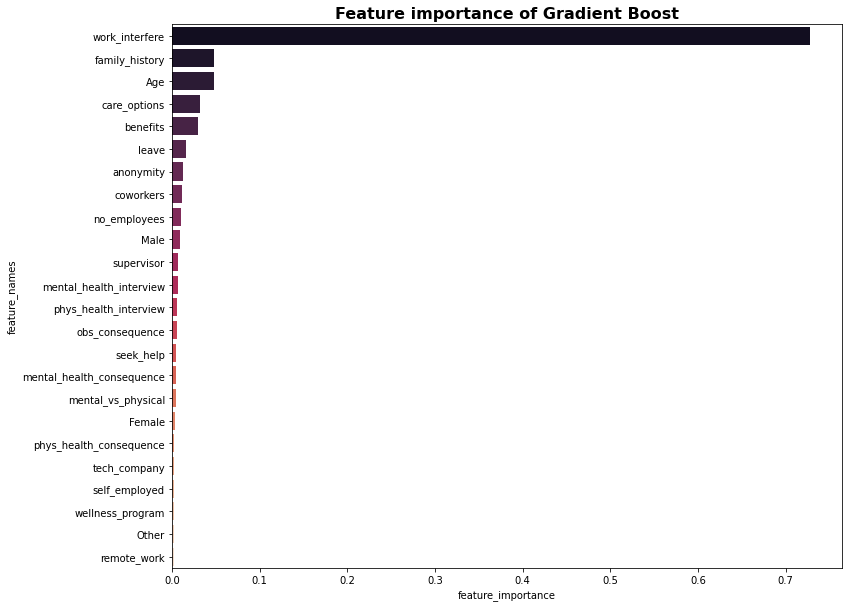

In [ ]:
#feature importance 
#makes a graph that details the importance of each column on a graph
import matplotlib.pyplot as plt
import seaborn as sns
data = {'feature_names':features,'feature_importance': grd_bst.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Feature importance of Gradient Boost", fontsize=16, fontweight="bold")


Text(0.5, 1.0, 'Permutation importance of Logistic Regression')

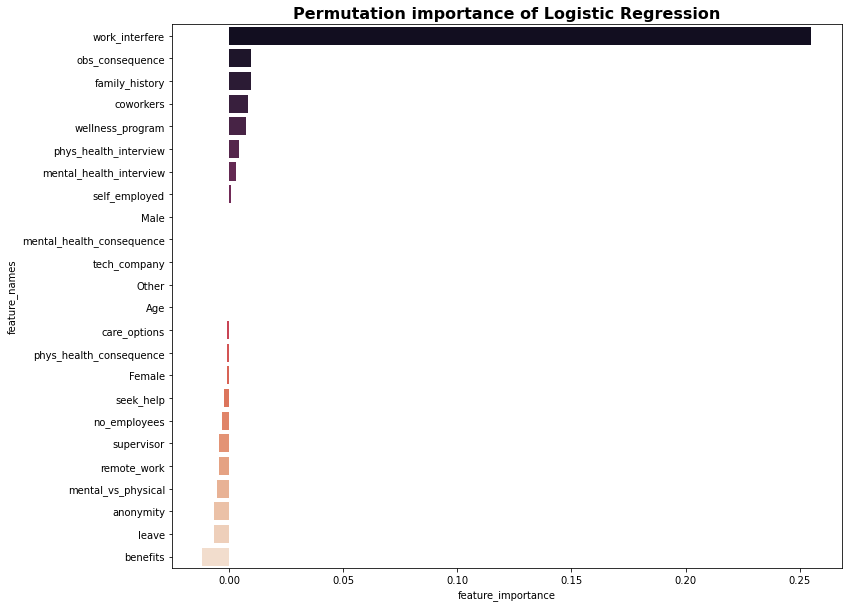

In [ ]:
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn  
#makes a graph that details the importance of each column on a graph
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
perm_importance = permutation_importance(log_reg, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

data = {'feature_names':features,'feature_importance':perm_importance.importances_mean}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Permutation importance of Logistic Regression", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Permutation importance of Support Vector Classifier')

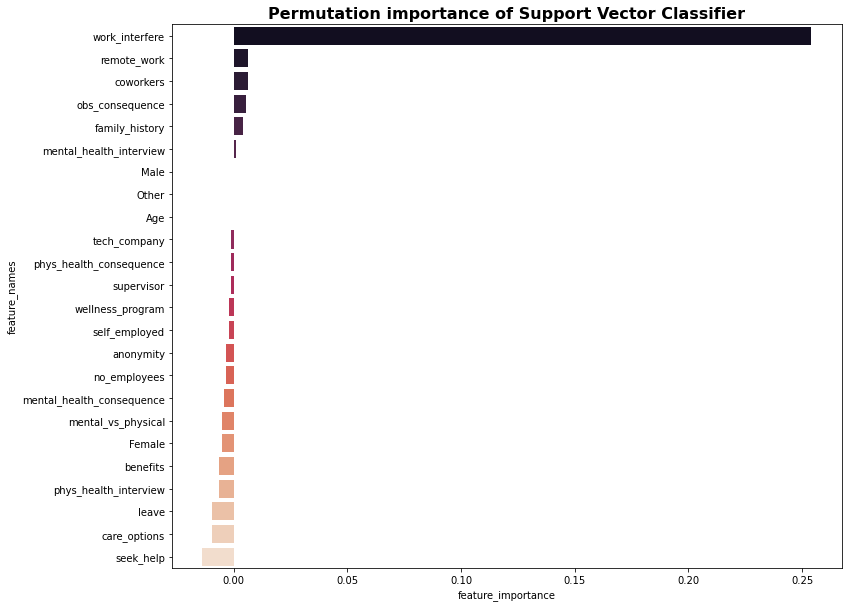

In [ ]:
#makes a graph that details the importance of each column on a graph
perm_importance = permutation_importance(svc_clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

data = {'feature_names':features,'feature_importance':perm_importance.importances_mean}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Permutation importance of Support Vector Classifier", fontsize=16, fontweight="bold")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


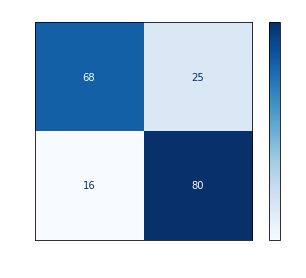

From top right to top left to bottom left to bottom right it goes:  FP, TP, FN, TN


In [ ]:
#https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
#This is a confusion matrix that details the accuracy of the model. 
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, prediction2)
cm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(svc_clf , X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print("From top right to top left to bottom left to bottom right it goes:  FP, TP, FN, TN")